#Atividade 02 - Unidade 01
**IMD1155 - ANÁLISE DE REDES - T01**



*   Carlos Eduardo Alves Sarmento
*   Carmem Stefanie da Silva Cavalcante



# Observação

O dataset utilizado nessa atividade foi produzido pelos autores com bases nos [Dados Estatísticos de Voos](https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/dados-estatisticos) e na [Lista de Aeródromos Públicos](https://www.anac.gov.br/acesso-a-informacao/dados-abertos/areas-de-atuacao/aerodromos/lista-de-aerodromos-publicos-v2), ambos da ANAC.

#Importação e leitura

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [105]:
df = pd.read_csv('malha_aerea_br.csv')

df.rename(columns={
    'latitute_destino': 'latitude_destino',
    'latitute_origem': 'latitude_origem'
}, inplace=True)

df_clean = df.drop_duplicates(subset=['nome_aeroporto_origem', 'nome_aeroporto_destino'])
df_clean.head()

,empresa,ano,mes,sigla_aeroporto_origem,nome_aeroporto_origem,sigla_aeroporto_destino,nome_aeroporto_destino,geopoint_lat_origem,geopoint_lon_origem,latitude_origem,longitude_origem,geopoint_lat_destino,geopoint_lon_destino,latitude_destino,longitude_destino
0,ABAETÉ LINHAS AÉREAS S.A.,2017,3,SBSV,SALVADOR,SNGI,GUANAMBI,-12.908611,-38.322500,"12°54'31.0S""","038°19'21.0W""",-14.208056,-42.746111,"14°12'29.0S""","042°44'46.0W"""
1,ABAETÉ LINHAS AÉREAS S.A.,2017,3,SBSV,SALVADOR,SNVB,VALENÇA,-12.908611,-38.322500,"12°54'31.0S""","038°19'21.0W""",-13.296389,-38.992500,"13°17'47.0S""","038°59'33.0W"""
2,ABAETÉ LINHAS AÉREAS S.A.,2017,3,SNGI,GUANAMBI,SBSV,SALVADOR,-14.208056,-42.746111,"14°12'29.0S""","042°44'46.0W""",-12.908611,-38.322500,"12°54'31.0S""","038°19'21.0W"""
3,ABAETÉ LINHAS AÉREAS S.A.,2017,3,SNVB,VALENÇA,SBSV,SALVADOR,-13.296389,-38.992500,"13°17'47.0S""","038°59'33.0W""",-12.908611,-38.322500,"12°54'31.0S""","038°19'21.0W"""
4,ABAETÉ LINHAS AÉREAS S.A.,2017,4,SBAR,ARACAJU,SBRF,RECIFE,-10.985278,-37.073333,"10°59'07.0S""","037°04'24.0W""",-8.126389,-34.922778,"08°07'35.0S""","034°55'22.0W"""


#Criando a rede

In [102]:
G = nx.Graph()

for index, row in df_clean.iterrows():
  aero_origem = row['nome_aeroporto_origem']
  aero_destino = row['nome_aeroporto_destino']

  sigla_aero = row['sigla_aeroporto_destino']
  latitude = row['latitude_destino']
  longitude = row['longitude_destino']
  
  G.add_node(aero_destino, sigla=sigla_aero, latitude=latitude, longitude=longitude)
  G.add_edge(aero_origem, aero_destino)

#Visão geral


In [103]:
grau_medio = sum([G.degree(n) for n in G.nodes()])/len([G.degree(n) for n in G.nodes()])

print('Quantidade de nós na rede:', G.number_of_nodes())
print('Quantidade de arestas na rede:', G.number_of_edges())
print('Grau médio dos nós da rede:', round(grau_medio, 2))


Quantidade de nós na rede: 204
Quantidade de arestas na rede: 1504
Grau médio dos nós da rede: 14.75


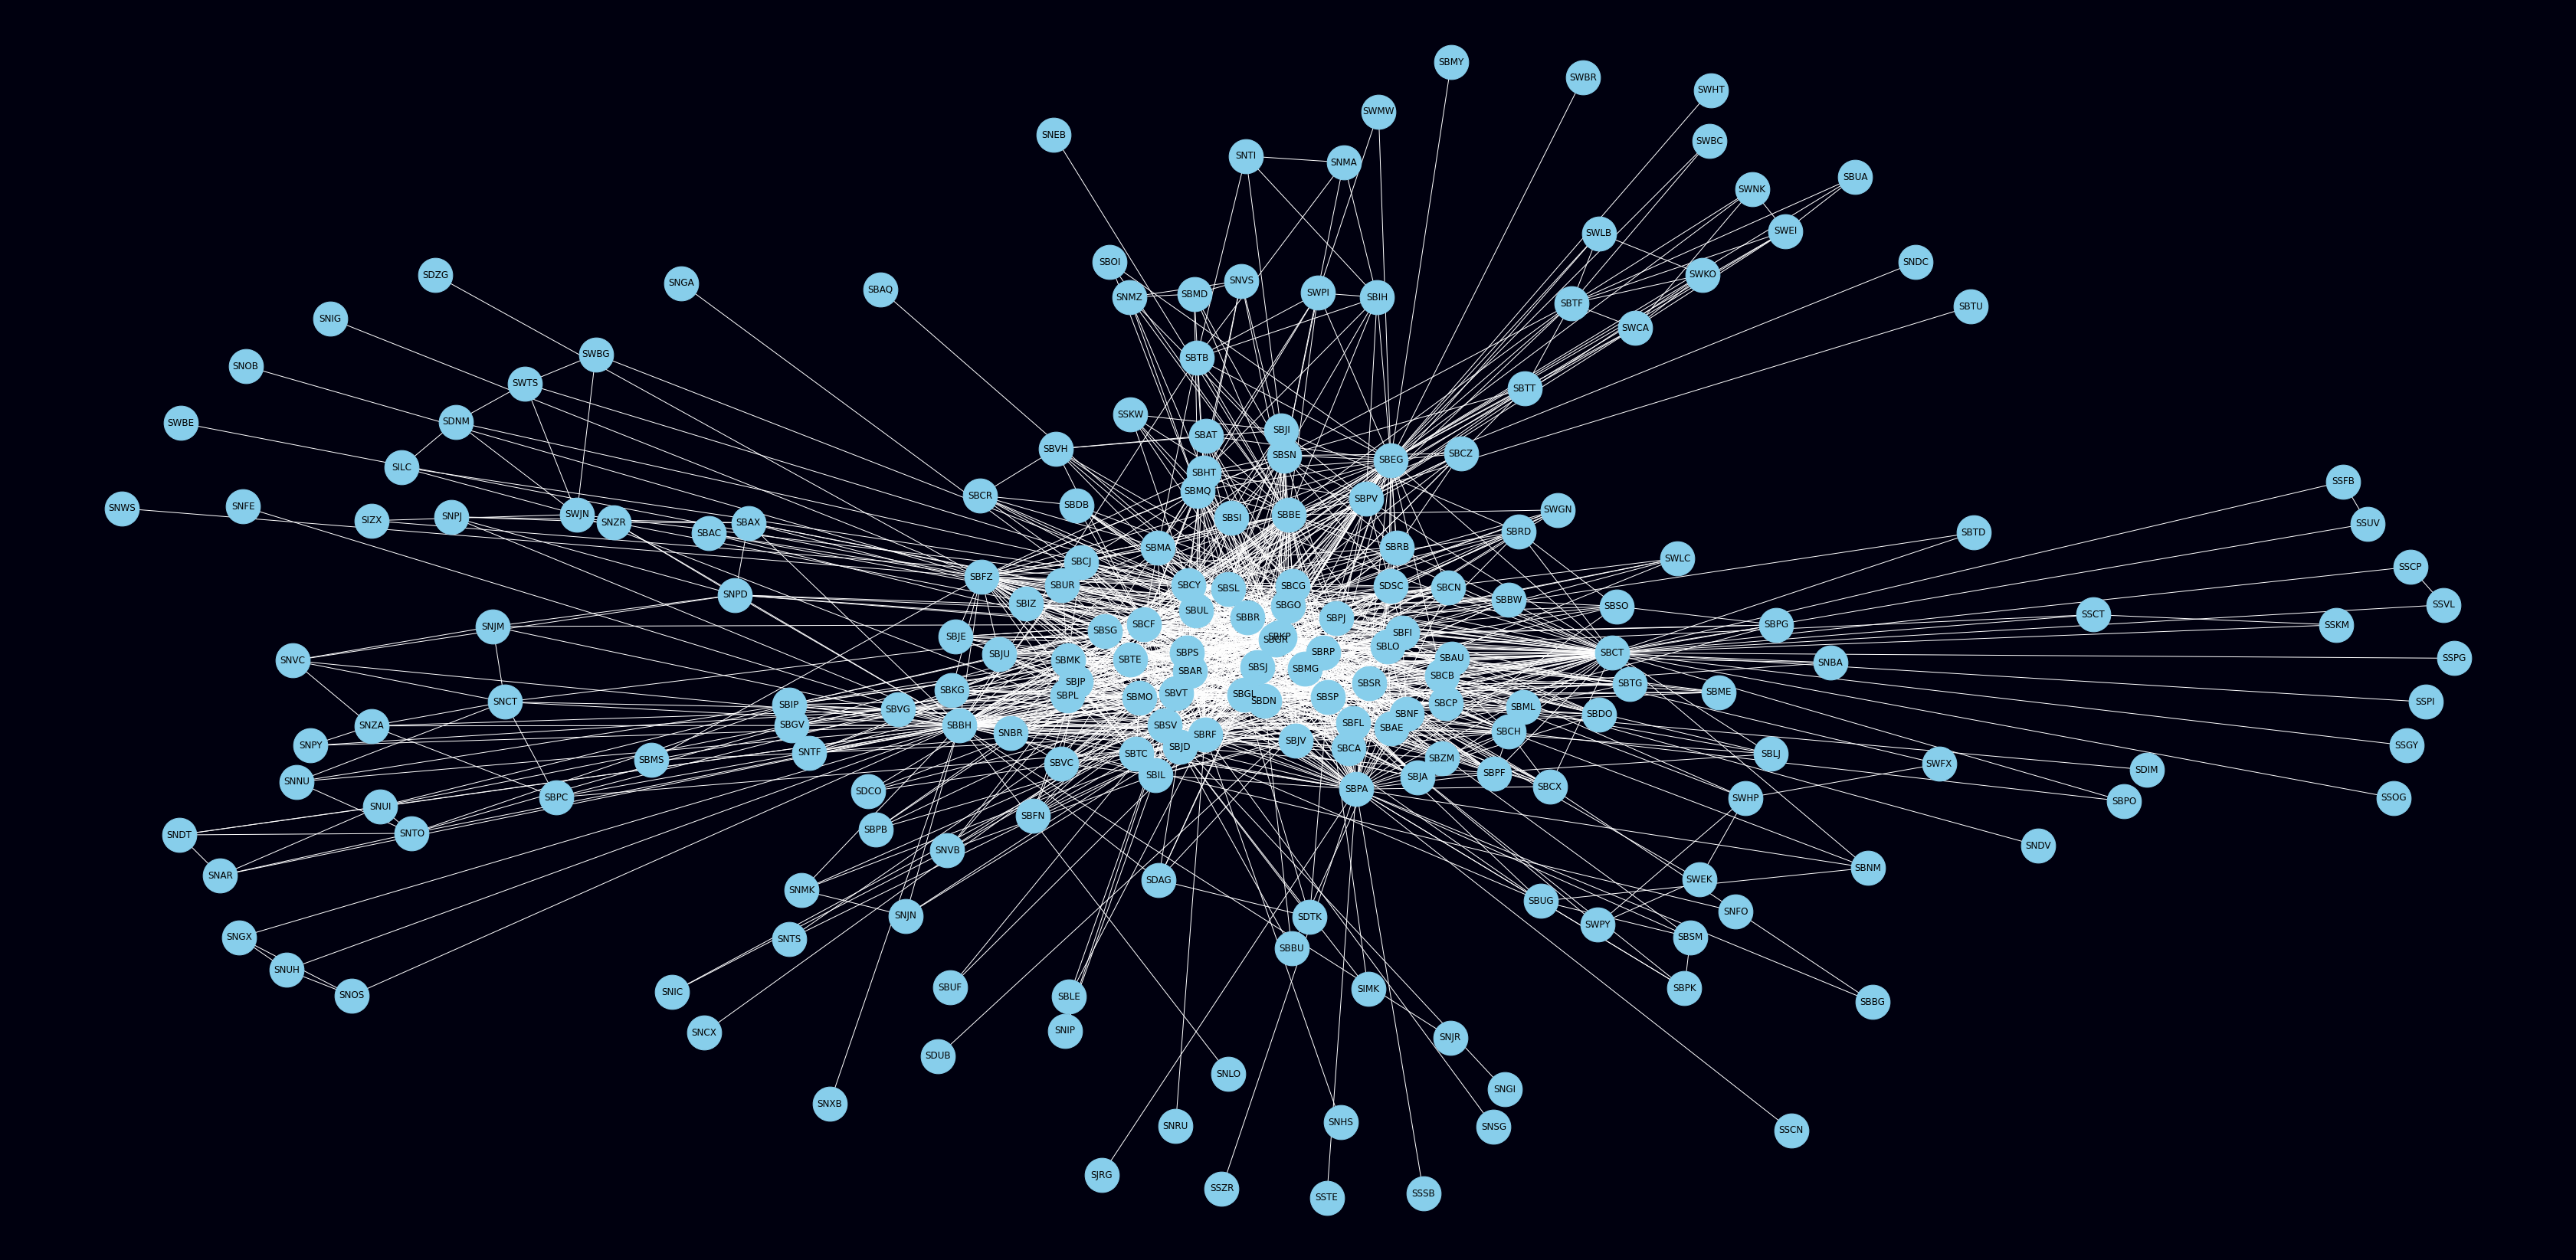

In [104]:
fig, ax = plt.subplots(1,1,figsize=(60,30))

nx.draw(G, labels=nx.get_node_attributes(G, 'sigla') , with_labels=True, node_color='skyblue', edge_color='white', node_size=2000, ax=ax)
fig.set_facecolor("#00000F")
plt.show()

#Exercícios propostos

##Exercicio 1

A distância entre Rio de Janeiro e Manaus é de 2850 km. Será que existe um voo direto conectando essas duas capitais?

In [69]:
nx.has_path(G, 'RIO DE JANEIRO', 'MANAUS')

True

Sim, existe! Inclusive, esse é o voo direto mais longo do Brasil. Até agosto de 2019, esse posto era ocupado pelo voo da Latam entre Fortaleza e Porto Alegre, que percorria 3200 km em 4 horas e meia, porém a rota foi desativada.

##Exercício 2

O voo entre Fortaleza e Porto Alegre citado anteriormente está registrado no nosso dataset. Porém, se retirarmos ele, quais ficam sendo os itinerários com menos conexões conectando essas duas capitais?

In [98]:
G.remove_edge('FORTALEZA', 'PORTO ALEGRE')

for pth in nx.all_shortest_paths(G, 'FORTALEZA', 'PORTO ALEGRE'):
    print(pth)

['FORTALEZA', 'SALVADOR', 'PORTO ALEGRE']
['FORTALEZA', 'BELÉM', 'PORTO ALEGRE']
['FORTALEZA', 'CONFINS', 'PORTO ALEGRE']
['FORTALEZA', 'VÁRZEA GRANDE', 'PORTO ALEGRE']
['FORTALEZA', 'MANAUS', 'PORTO ALEGRE']
['FORTALEZA', 'GOIÂNIA', 'PORTO ALEGRE']
['FORTALEZA', 'GUARULHOS', 'PORTO ALEGRE']
['FORTALEZA', 'CAMPINAS', 'PORTO ALEGRE']
['FORTALEZA', 'RIO LARGO', 'PORTO ALEGRE']
['FORTALEZA', 'PORTO SEGURO', 'PORTO ALEGRE']
['FORTALEZA', 'RECIFE', 'PORTO ALEGRE']
['FORTALEZA', 'SÃO GONÇALO DO AMARANTE', 'PORTO ALEGRE']
['FORTALEZA', 'SÃO LUÍS', 'PORTO ALEGRE']
['FORTALEZA', 'TERESINA', 'PORTO ALEGRE']
['FORTALEZA', 'ILHÉUS', 'PORTO ALEGRE']
['FORTALEZA', 'BELO HORIZONTE', 'PORTO ALEGRE']
['FORTALEZA', 'BRASÍLIA', 'PORTO ALEGRE']
['FORTALEZA', 'SÃO JOSÉ DOS PINHAIS', 'PORTO ALEGRE']
['FORTALEZA', 'FOZ DO IGUAÇU', 'PORTO ALEGRE']
['FORTALEZA', 'PRESIDENTE PRUDENTE', 'PORTO ALEGRE']
['FORTALEZA', 'RIO DE JANEIRO', 'PORTO ALEGRE']
['FORTALEZA', 'LONDRINA', 'PORTO ALEGRE']
['FORTALEZA', 'MARING

##Exercício 3

Vimos que ao desativar o voo direto mais longo, precisou-se apenas de uma conexão para conectar as duas capitais. Será que existe caminhos possíveis para ir de qualquer aeroporto para qualquer outro aeroporto?

In [72]:
nos = list(G.nodes())

for i in range (0, len(nos)):
  for j in range(0, len(nos)):
    if nx.has_path(G,  nos[i], nos[j]) == False:
      print(nos[i], '-', nos[j])

O código acima imprimiria qualquer par de aeroportos que não possuísse um caminho conectando-os, porém nada foi impresso. Então sim, é possível ir de qualquer aeroporto para qualquer aeroporto no Brasil.